In [30]:
# c) If we look at the total money earned by Day 30, does our choice change ?

# First of all, the necessary libraries imported to the notebook.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def retention_curve(d1, d3, d7, d14, maximum=30):
    # Calculating retention points with log-linear interpolation for not known days (From D0 to D14) 
    known_days = np.array([0,1,3,7,14])
    reten_rates = ([1.0, d1, d3, d7, d14])
    reten_days = np.arange(0, maximum + 1)
    log_reten_known = np.log(reten_rates)
    log_reten_days = np.interp(reten_days, known_days, log_reten_known)
    reten_back  = np.exp(log_reten_days)
    
    # After D14 
    slope = (np.log(d14) - np.log(d7)) / 7
    for day in range(15, maximum + 1):
        reten_back[day] = np.exp(np.log(d14) + slope * (day - 14))
    
    return pd.Series(reten_back, index=reten_days, name="retention")


# The question asks for total money by DAY 30, so we use same logic at the below piece of code that is programmed in the "retention_curve.ipynb".
A = retention_curve(0.53, 0.27, 0.17, 0.06, maximum=30)
B = retention_curve(0.48, 0.25, 0.19, 0.09, maximum=30)
installs = 20000

# This time, we use do not use .loc[] method because we need cumulative sum of DAU(30).
A_dau = installs * A.cumsum()
B_dau = installs * B.cumsum()

In [31]:
A_purch_ratio = 0.0305
B_purch_ratio = 0.0315

# Calculating Daily Purchase Revenue: DPR = A(DAU(t)) * daily purchase ratio * $1 for by Day 30 
A_DPR = A_dau * A_purch_ratio * 1
B_DPR = B_dau * B_purch_ratio * 1

print("After 30 Days' Purchase Revenue for Variant A is: ", sum((A_DPR)))
print("After 30 Days' Purchase Revenue for Variant B is: ", sum((B_DPR)))

After 30 Days' Purchase Revenue for Variant A is:  63640.70775643282
After 30 Days' Purchase Revenue for Variant B is:  68775.78247381201


In [32]:
# Calculating Ad Revenue(t)= (AD Impresssion/DAU) * eCPM * DAU(t) by Day 30
A_eCPM = 9.80
B_eCPM = 10.80

A_Ad_DAU = 2.3
B_Ad_DAU = 1.6

A_Ad_Revenue = A_Ad_DAU * (A_eCPM / 1000) * A_dau
B_Ad_Revenue = B_Ad_DAU * (B_eCPM / 1000) * B_dau

print("After 30 Days' Ad Revenue for Variant A is: ", sum(((A_Ad_Revenue))))
print("After 30 Days' Ad Revenue for Variant B is: ", sum(((B_Ad_Revenue))))

After 30 Days' Ad Revenue for Variant A is:  47031.52632229495
After 30 Days' Ad Revenue for Variant B is:  37728.42924277687


In [33]:
# Calculating the total money by Day 30 : IAP(t) + Ad(t)

A_total = (A_DPR + A_Ad_Revenue).sum()
B_total = (B_DPR + B_Ad_Revenue).sum()

print("Variant A will earn by Day 30: ", A_total)
print("Variant B will earn by Day 30: ", B_total,"\n")

if A_total > B_total:
    print("Variant A will earn the most total money by Day 30: ", A_total)
else:
    print("Variant B will earn the most total money by Day 30: ", B_total)

Variant A will earn by Day 30:  110672.23407872776
Variant B will earn by Day 30:  106504.21171658888 

Variant A will earn the most total money by Day 30:  110672.23407872776


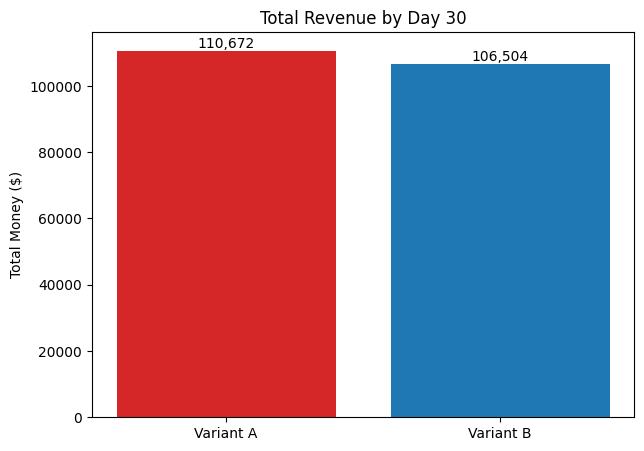

In [34]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:red', 'tab:blue']
plt.bar(["Variant A", "Variant B"], [A_total, B_total], color=bar_colors)

plt.ylabel("Total Money ($)")
plt.title("Total Revenue by Day 30")
plt.text(0, A_total, f"{A_total:,.0f}", ha="center", va="bottom")
plt.text(1, B_total, f"{B_total:,.0f}", ha="center", va="bottom")
plt.show()

Due to the calculations and this bar graph, Variant A still makes more money than Variant B by Day 30. So, the choice do not need to be changed in favour of Variant B. We should keep up with Variant A. 